In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

In [2]:
# Option to display full float formats instead of scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# Load full database
df = pickle.load(open("../data/dataset_consolidated.p", "rb"))

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head(5)

,Time,time_datetime,subject,trial_type,trial_num,trial_subtype,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),...,waist Acceleration Y (m/s^2),waist Acceleration Z (m/s^2),waist Angular Velocity X (rad/s),waist Angular Velocity Y (rad/s),waist Angular Velocity Z (rad/s),waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),FileName,target
0,1304799112429680,2011-05-07 20:11:52.429680,1,ADLs,trial1,SQ,-9.691,-0.241,-1.514,0.219,...,-0.123,2.295,0.151,1.113,-0.005,45.724,-24.730,-24.925,JXL_SQ_trial1.xlsx,0
1,1304799112437500,2011-05-07 20:11:52.437500,1,ADLs,trial1,SQ,-9.698,-0.245,-1.510,0.214,...,-0.132,2.297,0.151,1.119,-0.005,43.055,-27.175,-17.819,JXL_SQ_trial1.xlsx,0
2,1304799112445310,2011-05-07 20:11:52.445310,1,ADLs,trial1,SQ,-9.707,-0.241,-1.503,0.215,...,-0.129,2.300,0.142,1.112,-0.005,35.924,-24.854,-22.314,JXL_SQ_trial1.xlsx,0
3,1304799112453120,2011-05-07 20:11:52.453120,1,ADLs,trial1,SQ,-9.701,-0.238,-1.503,0.212,...,-0.157,2.285,0.146,1.116,-0.005,40.471,-33.320,-20.664,JXL_SQ_trial1.xlsx,0
4,1304799112460930,2011-05-07 20:11:52.460930,1,ADLs,trial1,SQ,-9.698,-0.243,-1.508,0.217,...,-0.143,2.302,0.153,1.124,-0.017,45.634,-24.349,-20.064,JXL_SQ_trial1.xlsx,0


### Data at first sight

Here is an excerpt of the the data description from the file README.txt:

* Dataset Description: Inertial Measurement Unit Fall Detection Dataset (IMU Dataset)

* IMU Dataset is a dataset devised to benchmark fall detection and prediction algorithms based on <font color='red'>**acceleration, angular velocity and magnetic fields**</font> of body-worn APDM Opal IMU sensors at 7 body locations (right ankle, left ankle, right thigh, left thigh, head, sternum, and waist).

* Each one of the 10 subject underwent 60 trials (15 Activity of Daily Livings - ADLs, 24 Falls, and 15 Near Falls)

#### Dataset columns
- Time: timestamp (the number of microseconds that has elapsed since 1 January 1970), unit = uS
- r.ankle Acceleration X (m/s^2): Right ankle's acceleration along X axis, unit = m/s^2
- r.ankle Acceleration Y (m/s^2): Right ankle's acceleration along Y axis, unit = m/s^2
- r.ankle Acceleration Z (m/s^2): Right ankle's acceleration along Z axis, unit = m/s^2
- r.ankle Angular Velocity X (rad/s): Right ankle's angular velocity along X axis, unit = rad/s
- r.ankle Angular Velocity Y (rad/s): Right ankle's angular velocity along Y axis, unit = rad/s
- r.ankle Angular Velocity Z (rad/s): Right ankle's angular velocity along Z axis, unit = rad/s
- r.ankle Magnetic Field X (uT): Right ankle's magnetic field along X axis, unit = uT
- r.ankle Magnetic Field Y (uT): Right ankle's magnetic field along Y axis, unit = uT
- r.ankle Magnetic Field Z (uT): Right ankle's magnetic field along Z axis, unit = uT
- l.ankle Acceleration X (m/s^2): Left ankle's acceleration along X axis, unit = m/s^2
- l.ankle Acceleration Y (m/s^2): Left ankle's acceleration along Y axis, unit = m/s^2
- l.ankle Acceleration Z (m/s^2): Left ankle's acceleration along Z axis, unit = m/s^2
- l.ankle Angular Velocity X (rad/s): Left ankle's angular velocity along X axis, unit = rad/s
- l.ankle Angular Velocity Y (rad/s): Left ankle's angular velocity along Y axis, unit = rad/s
- l.ankle Angular Velocity Z (rad/s): Left ankle's angular velocity along Z axis, unit = rad/s
- l.ankle Magnetic Field X (uT): Left ankle's magnetic field along X axis, unit = uT
- l.ankle Magnetic Field Y (uT): Left ankle's magnetic field along Y axis, unit = uT
- l.ankle Magnetic Field Z (uT): Left ankle's magnetic field along Z axis, unit = uT
- r.thigh Acceleration X (m/s^2): Right thigh's acceleration along X axis, unit = m/s^2
- r.thigh Acceleration Y (m/s^2): Right thigh's acceleration along Y axis, unit = m/s^2
- r.thigh Acceleration Z (m/s^2): Right thigh's acceleration along Z axis, unit = m/s^2
- r.thigh Angular Velocity X (rad/s): Right thigh's angular velocity along X axis, unit = rad/s
- r.thigh Angular Velocity Y (rad/s): Right thigh's angular velocity along Y axis, unit = rad/s
- r.thigh Angular Velocity Z (rad/s): Right thigh's angular velocity along Z axis, unit = rad/s
- r.thigh Magnetic Field X (uT): Right thigh's magnetic field along X axis, unit = uT
- r.thigh Magnetic Field Y (uT): Right thigh's magnetic field along Y axis, unit = uT
- r.thigh Magnetic Field Z (uT): Right thigh's magnetic field along Z axis, unit = uT
- l.thigh Acceleration X (m/s^2): Left thigh's acceleration along X axis, unit = m/s^2
- l.thigh Acceleration Y (m/s^2): Left thigh's acceleration along Y axis, unit = m/s^2
- l.thigh Acceleration Z (m/s^2): Left thigh's acceleration along Z axis, unit = m/s^2
- l.thigh Angular Velocity X (rad/s): Left thigh's angular velocity along X axis, unit = rad/s
- l.thigh Angular Velocity Y (rad/s): Left thigh's angular velocity along Y axis, unit = rad/s
- l.thigh Angular Velocity Z (rad/s): Left thigh's angular velocity along Z axis, unit = rad/s
- l.thigh Magnetic Field X (uT): Left thigh's magnetic field along X axis, unit = uT
- l.thigh Magnetic Field Y (uT): Left thigh's magnetic field along Y axis, unit = uT
- l.thigh Magnetic Field Z (uT): Left thigh's magnetic field along Z axis, unit = uT
- head Acceleration X (m/s^2): Head's acceleration along X axis, unit = m/s^2
- head Acceleration Y (m/s^2): Head's acceleration along Y axis, unit = m/s^2
- head Acceleration Z (m/s^2): Head's acceleration along Z axis, unit = m/s^2
- head Angular Velocity X (rad/s): Head's angular velocity along X axis, unit = rad/s
- head Angular Velocity Y (rad/s): Head's angular velocity along Y axis, unit = rad/s
- head Angular Velocity Z (rad/s): Head's angular velocity along Z axis, unit = rad/s
- head Magnetic Field X (uT): Head's magnetic field along X axis, unit = uT
- head Magnetic Field Y (uT): Head's magnetic field along Y axis, unit = uT
- head Magnetic Field Z (uT): Head's magnetic field along Z axis, unit = uT
- sternum Acceleration X (m/s^2): Sternum's acceleration along X axis, unit = m/s^2
- sternum Acceleration Y (m/s^2): Sternum's acceleration along Y axis, unit = m/s^2
- sternum Acceleration Z (m/s^2): Sternum's acceleration along Z axis, unit = m/s^2
- sternum Angular Velocity X (rad/s): Sternum's angular velocity along X axis, unit = rad/s
- sternum Angular Velocity Y (rad/s): Sternum's angular velocity along Y axis, unit = rad/s
- sternum Angular Velocity Z (rad/s): Sternum's angular velocity along Z axis, unit = rad/s
- sternum Magnetic Field X (uT): Sternum's magnetic field along X axis, unit = uT
- sternum Magnetic Field Y (uT): Sternum's magnetic field along Y axis, unit = uT
- sternum Magnetic Field Z (uT): Sternum's magnetic field along Z axis, unit = uT
- waist Acceleration X (m/s^2): Waist's acceleration along X axis, unit = m/s^2
- waist Acceleration Y (m/s^2): Waist's acceleration along Y axis, unit = m/s^2
- waist Acceleration Z (m/s^2): Waist's acceleration along Z axis, unit = m/s^2
- waist Angular Velocity X (rad/s): Waist's angular velocity along X axis, unit = rad/s
- waist Angular Velocity Y (rad/s): Waist's angular velocity along Y axis, unit = rad/s
- waist Angular Velocity Z (rad/s): Waist's angular velocity along Z axis, unit = rad/s
- waist Magnetic Field X (uT): Waist's magnetic field along X axis, unit = uT
- waist Magnetic Field Y (uT): Waist's magnetic field along Y axis, unit = uT
- waist Magnetic Field Z (uT): Waist's magnetic field along Z axis, unit = uT

#### Units
- Aceleration: $m/s^2$
- Angular Velocity: rad/s
- Magnectic Field: uT

#### Notes
- The columns below were included to improve the analysis and are not from the original dataset:
    * **time_datetime:** represent the currect date and time of the measure
    * **subject:** subject (student with sensors) who executed the moviments to collect the data
    * **trial_type:** ADL, Fall or NonFall
    * **trial_num:** trial number executed by the subject
    * **trial_subtype:** type of movement of the trial: standing still, picking object from the floor, etc.
    * **FileName:** name of the Excel file with original data
    * **target:** classification as fall (1) or non fall (0)


<hr>

### Overview of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190369 entries, 0 to 1920
Data columns (total 71 columns):
Time                                  1190369 non-null int64
time_datetime                         1190369 non-null datetime64[ns]
subject                               1190369 non-null int64
trial_type                            1190369 non-null object
trial_num                             1190369 non-null object
trial_subtype                         1190369 non-null object
r.ankle Acceleration X (m/s^2)        1190369 non-null float64
r.ankle Acceleration Y (m/s^2)        1190369 non-null float64
r.ankle Acceleration Z (m/s^2)        1190369 non-null float64
r.ankle Angular Velocity X (rad/s)    1190369 non-null float64
r.ankle Angular Velocity Y (rad/s)    1190369 non-null float64
r.ankle Angular Velocity Z (rad/s)    1190369 non-null float64
r.ankle Magnetic Field X (uT)         1190369 non-null float64
r.ankle Magnetic Field Y (uT)         1190369 non-null float64
r.ankle 

In [7]:
df.drop('Time',axis=1).describe()

,subject,r.ankle Acceleration X (m/s^2),r.ankle Acceleration Y (m/s^2),r.ankle Acceleration Z (m/s^2),r.ankle Angular Velocity X (rad/s),r.ankle Angular Velocity Y (rad/s),r.ankle Angular Velocity Z (rad/s),r.ankle Magnetic Field X (uT),r.ankle Magnetic Field Y (uT),r.ankle Magnetic Field Z (uT),...,waist Acceleration X (m/s^2),waist Acceleration Y (m/s^2),waist Acceleration Z (m/s^2),waist Angular Velocity X (rad/s),waist Angular Velocity Y (rad/s),waist Angular Velocity Z (rad/s),waist Magnetic Field X (uT),waist Magnetic Field Y (uT),waist Magnetic Field Z (uT),target
count,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,...,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000,1190369.000
mean,5.502,-8.256,-0.017,-1.566,0.248,0.042,-0.007,42.428,3.866,6.677,...,-6.969,-0.231,3.076,0.153,1.158,0.006,28.803,-26.100,-10.069,0.339
std,2.871,5.047,5.022,4.136,0.771,0.551,1.092,17.497,21.941,21.931,...,4.911,3.157,3.894,0.448,0.575,0.446,17.615,21.244,18.167,0.473
min,1.000,-74.744,-72.542,-72.207,-31.687,-12.540,-16.059,-46.940,-81.756,-66.438,...,-74.920,-71.254,-74.766,-9.792,-16.823,-17.157,-61.546,-114.654,-78.526,0.000
25%,3.000,-9.775,-1.104,-2.392,0.218,0.017,-0.031,36.346,-6.244,-4.315,...,-9.347,-1.219,1.593,0.124,1.106,-0.028,26.074,-38.393,-22.409,0.000
50%,6.000,-9.658,-0.061,-1.418,0.249,0.033,-0.015,47.186,7.199,4.651,...,-8.602,-0.390,3.626,0.155,1.182,0.007,34.876,-26.312,-11.560,0.000
75%,8.000,-8.770,0.770,-0.547,0.271,0.056,-0.003,53.291,17.321,18.721,...,-7.099,0.874,5.504,0.185,1.220,0.037,39.492,-14.622,1.831,1.000
max,10.000,73.110,73.010,73.885,37.781,18.571,22.526,112.029,87.860,83.543,...,75.832,73.850,74.655,10.102,15.534,14.836,76.572,69.683,58.206,1.000


<hr>

### Checking the distribution of the types of trials

Text(0,0.5,'Qtd of measurements')

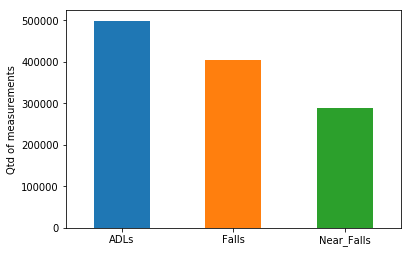

In [8]:
dist = df.trial_type.value_counts()
fig, ax = plt.subplots()
dist.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
ax.set_ylabel('Qtd of measurements')


#### Conclusion:

Classes may be unbalanced. During the model training we could try also balance the data.


<hr>

### Checking duplicates

In [9]:
print('Before: ',df.shape)
df = df.drop_duplicates()
print('After:  ', df.shape)

Before:  (1190369, 71)
After:   (1190369, 71)


#### Conclusion: 

No duplicates

<hr>

### Results of the trials

In [13]:
body_locations = list(filter(None,set(meta.body_location.values)))
measure = list(filter(None,set(meta.measure.values)))
axis = list(filter(None,set(meta.axis.values)))
print('Body Locations: ' , body_locations)
print('Measures: ', measure)
print('Axis: ', axis)

Body Locations:  ['waist', 'r.thigh', 'l.ankle', 'r.ankle', 'l.thigh', 'sternum', 'head']
Measures:  ['angular velocity', 'magnetic field', 'acceleration']
Axis:  ['Y', 'X', 'Z']


In [15]:
# for bl in body_locations:
#     for m in measure:
        

Text(0.5,1,'Falls - Subject 1 - Slip')

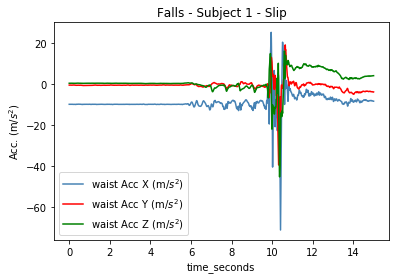

In [16]:
meta_acceletarion = list(meta[meta.measure=='acceleration'].index)
subtype = 'slip'
trial = 'trial1'
subject = 1
trial_type = 'Falls'
df_graph = df[(df.trial_subtype == subtype) & 
              (df.trial_num == trial) &
              (df.subject == subject) &
              (df['trial_type'] == trial_type)
             ][['Time']+meta_acceletarion]

initial_time = df_graph.Time.min()
# Setting the time in seconds and restart the time counting from the first measeure of this trial
df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

fig, ax = plt.subplots()
df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax, label='waist Acc X (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax, label='waist Acc Y (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax, label='waist Acc Z (m/$s^2$)')
plt.ylabel('Acc. (m/$s^2$)')
ax.legend()
ax.set_title('{} - Subject {} - {}'.format(trial_type, subject, str.capitalize(subtype)))

### Getting combinations of Trials, Types, XXXXXX


In [ ]:
df.head()

In [17]:
df_trials = df[['subject','trial_type','trial_num','trial_subtype']].drop_duplicates().sort_values(['subject','trial_type','trial_num','trial_subtype'])

In [18]:
df_trials_graphics = df_trials[(df_trials.subject==1) & (df_trials.trial_num == 'trial3')]
df_trials_graphics

,subject,trial_type,trial_num,trial_subtype
0,1,ADLs,trial3,AS
0,1,ADLs,trial3,DS
0,1,ADLs,trial3,DSL
0,1,ADLs,trial3,DSS
0,1,ADLs,trial3,NW
0,1,ADLs,trial3,POG
0,1,ADLs,trial3,RSS
0,1,ADLs,trial3,SQ
0,1,Falls,trial3,HB
0,1,Falls,trial3,ITCS


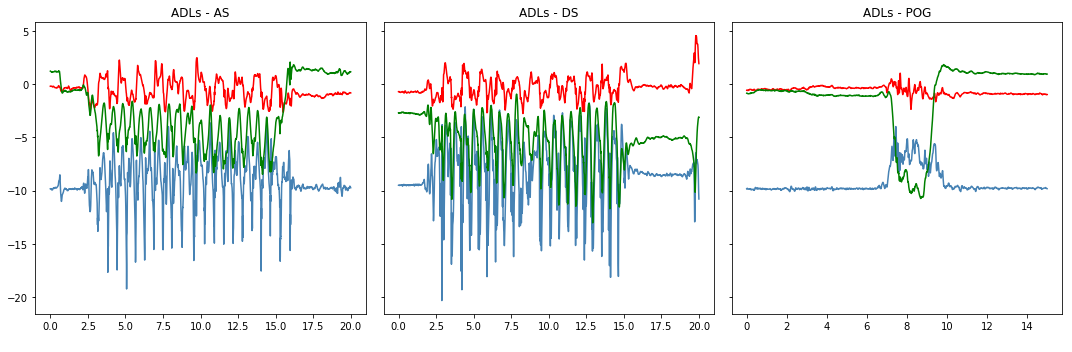

In [47]:

subject = 1
trial_num = 'trial3'
# types = list(set(df_trials_graphics.trial_type))
types = ['ADLs']
# subtypes = list(set(df_trials_graphics.trial_subtype))
# subtypes = ['AS','DS','DSL', 'DSS', 'NW', 'POG','RSS', 'SQ']
subtypes = ['AS','DS','POG']


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5), sharey=True)
# , ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

cont = 0
for tp in types:
    for sub in subtypes:
    
        df_graph = df[(df.subject == subject) &
                         (df.trial_num == trial_num) &
                         (df.trial_type == tp) &
                         (df.trial_subtype == sub)
                         ]

        initial_time = df_graph.Time.min()
        # Setting the time in seconds and restart the time counting from the first measeure of this trial
        df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

        df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax_list[cont], label='waist Acc X (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax_list[cont], label='waist Acc Y (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax_list[cont], label='waist Acc Z (m/$s^2$)')
        plt.ylabel('Acc. (m/$s^2$)')
        ax_list[cont].set_xlabel(' ')
        ax_list[cont].set_title('{} - {}'.format(tp, sub))

        cont = cont + 1
        plt.tight_layout()
# ax_list[cont-1].legend()

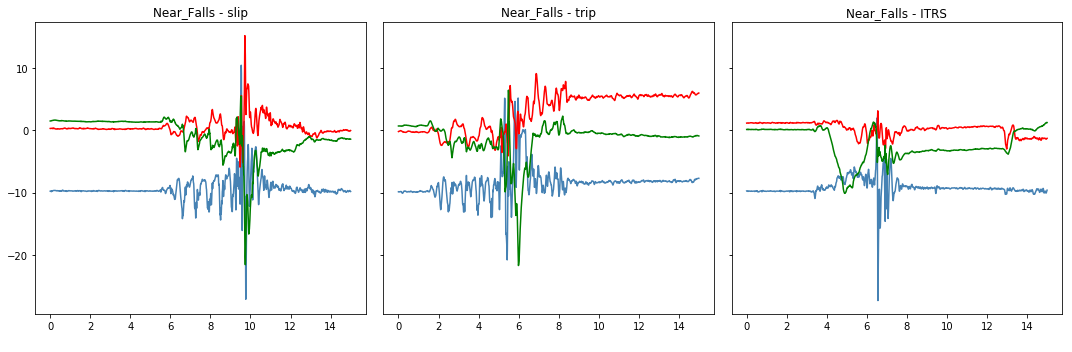

In [48]:
subject = 1
trial_num = 'trial3'
# types = list(set(df_trials_graphics.trial_type))
types = ['Near_Falls']
# subtypes = list(set(df_trials_graphics.trial_subtype))
# subtypes = ['AS','DS','DSL', 'DSS', 'NW', 'POG','RSS', 'SQ']
subtypes = ['slip','trip','ITRS']


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5), sharey=True)
# , ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

cont = 0
for tp in types:
    for sub in subtypes:
    
        df_graph = df[(df.subject == subject) &
                         (df.trial_num == trial_num) &
                         (df.trial_type == tp) &
                         (df.trial_subtype == sub)
                         ]

        initial_time = df_graph.Time.min()
        # Setting the time in seconds and restart the time counting from the first measeure of this trial
        df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

        df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax_list[cont], label='waist Acc X (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax_list[cont], label='waist Acc Y (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax_list[cont], label='waist Acc Z (m/$s^2$)')
        plt.ylabel('Acc. (m/$s^2$)')
        ax_list[cont].set_xlabel(' ')
        ax_list[cont].set_title('{} - {}'.format(tp, sub))

        cont = cont + 1
        plt.tight_layout()
# ax_list[cont-1].legend()

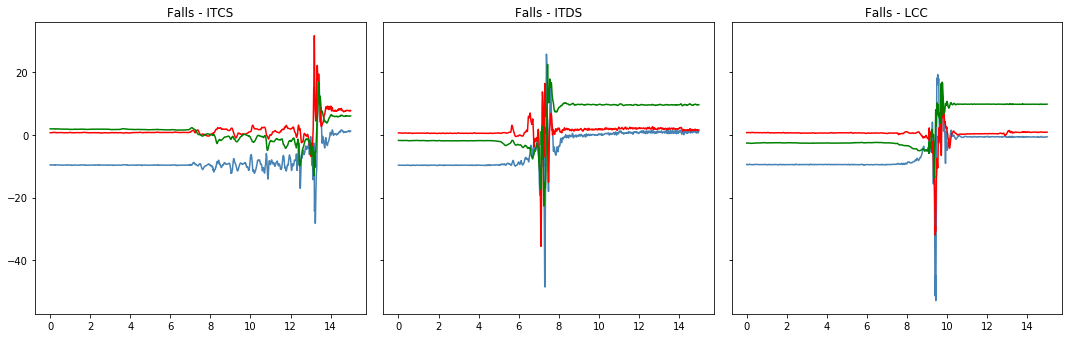

In [46]:

subject = 1
trial_num = 'trial3'
# types = list(set(df_trials_graphics.trial_type))
types = ['Falls']
# subtypes = list(set(df_trials_graphics.trial_subtype))
subtypes = ['ITCS','ITDS','LCC']


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,5), sharey=True)
# , ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15)
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

cont = 0
for tp in types:
    for sub in subtypes:
    
        df_graph = df[(df.subject == subject) &
                         (df.trial_num == trial_num) &
                         (df.trial_type == tp) &
                         (df.trial_subtype == sub)
                         ]

        initial_time = df_graph.Time.min()
        # Setting the time in seconds and restart the time counting from the first measeure of this trial
        df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)

        df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax_list[cont], label='waist Acc X (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax_list[cont], label='waist Acc Y (m/$s^2$)')
        df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax_list[cont], label='waist Acc Z (m/$s^2$)')
        plt.ylabel('Acc. (m/$s^2$)')
        ax_list[cont].set_xlabel(' ')
        ax_list[cont].set_title('{} - {}'.format(tp, sub))

        cont = cont + 1
        plt.tight_layout()
# ax_list[cont-1].legend()

### Behaviour for Subject 1 for:
- Trial 1
- Sensor on waist
- Acceleration Measurements


In [ ]:

# print(meta_acceletation)
subtype = ['slip']
trial = ['trial2']
body_part = ['waist']
subjects = [1]
trial_type = ['Falls']


df_graph = df[(df.trial_subtype == s_type) & 
              (df.trial_num == trial) &
              (df.subject == subjects) &
              (df.trial_type == t_type)
             ][['Time']+meta_acceletation]
print(df_graph.head())

initial_time = df_graph.Time.min()
# Setting the time in seconds and restart the time counting from the first measeure of this trial
df_graph['time_seconds'] = df_graph.Time.apply(lambda x: (x-initial_time)/1000000)



fig, ax = plt.subplots()
df_graph.set_index('time_seconds')['waist Acceleration X (m/s^2)'].plot(color='steelblue', ax=ax, label='waist Acc X (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Y (m/s^2)'].plot(color='red',ax=ax, label='waist Acc Y (m/$s^2$)')
df_graph.set_index('time_seconds')['waist Acceleration Z (m/s^2)'].plot(color='green',ax=ax, label='waist Acc Z (m/$s^2$)')
plt.ylabel('Acc. (m/$s^2$)')
ax.legend()
ax.set_title('{} - Subject {} - {}'.format(trial_type, subject, str.capitalize(subtype)))